In [1]:
!pip install opendatasets
!pip install pandas


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## About Dataset
### Context
#### Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

### Content
#### The database is composed by 10 different hand-gestures (showed above) that were performed by 10 different subjects (5 men and 5 women).

#### The database is structured in different folders as:

#### /00 (subject with identifier 00)
#### /01_palm (images for palm gesture of subject 00 )
#### /01_palm/frame_197957_r.png,…,frame_198136_l.png, … (images that corresponds to different samples obtained for the palm gesture performed by the subject with identifier 00)
#### /02_l (images for l gesture of subject 00 )
#### /10_down
#### /01
#### /02
#### /09 (last subject with identifier 09)
#### Every root folder (00, 01,…) contains the infrared images of one subject. The folder name is the identifier of each different subject.

## Aim and Objective

#### 1)	Study different supervised learning algorithms(ML and DL) and categorise them into different groups based on similarity of approaches or strategies used.
#### 2)	Study different performance evaluation metrics.
#### 3)	From each group of the supervised learning algorithms select one algorithm (with reason of selection)  and perform hand gesture recognition
#### 4)	Find the algorithm that performs best based on the metric selected(reason for selection of the particular metric)
#### 5)	Implement BSL on the optimal algorithm obtained.


In [2]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/gti-upm/leapgestrecog")


Skipping, found downloaded files in ".\leapgestrecog" (use force=True to force download)


In [4]:
import opendatasets as od

# URL for the "leapGestRecog" dataset
dataset_url = "https://www.kaggle.com/gti-upm/leapgestrecog"

od.download(dataset_url, force=True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ramyaabin
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 2.13G/2.13G [33:22<00:00, 1.14MB/s]


In [3]:
import os

# Directory where the "leapGestRecog" dataset is downloaded
dataset_dir = './leapgestrecog'

# List the folders in the 'leapGestRecog' directory
folders = os.listdir(os.path.join(dataset_dir, 'leapGestRecog'))

# The list 'folders' will contain the names of the different classes (hand gestures)
# Let's print the list to see the classes
print("Different Classes (Hand Gestures) in the Dataset:")
print(folders)




Different Classes (Hand Gestures) in the Dataset:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'leapGestRecog']


In [4]:
import os

# Directory where the "leapGestRecog" dataset is downloaded
dataset_dir = './leapgestrecog'

# List the folders in the 'leapGestRecog' directory
folders = os.listdir(os.path.join(dataset_dir, 'leapGestRecog'))

# Remove the folder 'leapGestRecog' from the list of different classes
different_classes = [folder for folder in folders if folder != 'leapGestRecog']

# Print the different classes (hand gestures) in the dataset
print("Different Classes (Hand Gestures) in the Dataset:")
print(different_classes)


Different Classes (Hand Gestures) in the Dataset:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [5]:
for folder in different_classes:
    class_dir = os.path.join(dataset_dir, 'leapGestRecog', folder)
    class_files = os.listdir(class_dir)
    print(f"Files in Class {folder}:")
    print(class_files)

Files in Class 00:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 01:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 02:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 03:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 04:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 05:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 06:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 07:
['01_palm', '02_l', '03_fist'

In [6]:
import os

# Directory where the "leapGestRecog" dataset is downloaded
dataset_dir = './leapgestrecog'

# List the folders in the 'leapGestRecog' directory
folders = os.listdir(os.path.join(dataset_dir, 'leapGestRecog'))

# Remove the folder 'leapGestRecog' from the list of different classes
different_classes = [folder for folder in folders if folder != 'leapGestRecog']

# Print the list of files in each class (hand gesture)
for folder in different_classes:
    class_dir = os.path.join(dataset_dir, 'leapGestRecog', folder)
    class_files = os.listdir(class_dir)
    print(f"Files in Class {folder}:")
    print(class_files)


Files in Class 00:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 01:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 02:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 03:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 04:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 05:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 06:
['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
Files in Class 07:
['01_palm', '02_l', '03_fist'

In [7]:
import os
import cv2
import numpy as np

# Directory where the "leapGestRecog" dataset is downloaded
dataset_dir = './leapgestrecog'

x = []  # List to store black and white images
y = []  # List to store labels (class index)
z = []  # List to store original images (grayscale)

threshold = 200

folders = os.listdir(os.path.join(dataset_dir, 'leapGestRecog'))

for i in folders:
    print('***', i, '***')
    subject = os.path.join(dataset_dir, 'leapGestRecog', i)
    subdir = os.listdir(subject)
    subdir = set(subdir)
    for j in subdir:
        print(j)
        images = os.listdir(os.path.join(subject, j))
        for k in images:
            results = dict()
            results['y'] = j.split('_')[0]
            img_path = os.path.join(subject, j, k)
            img = cv2.imread(img_path, 0)
            if img is None:
                print(f"Error: Unable to read image at path '{img_path}'. Skipping this image.")
                continue
            img = cv2.resize(img, (160, 60))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD = img.astype(np.float64)
            z.append(imgD)
            imgf = imgf.astype(np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x'] = imgf

print("Different Classes (Hand Gestures) in the Dataset:")
print(list(set(y)))


*** 00 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 01 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 02 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 03 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 04 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 05 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 06 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 07 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 08 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** 09 ***
03_fist
04_fist_moved
02_l
07_ok
09_c
06_index
08_palm_moved
10_down
01_palm
05_thumb
*** leapGestRecog ***
06
Error

Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\08\05_thumb'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\08\06_index'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\08\07_ok'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\08\08_palm_moved'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\08\09_c'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\08\10_down'. Skipping this image.
09
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\09\01_palm'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRecog\09\02_l'. Skipping this image.
Error: Unable to read image at path './leapgestrecog\leapGestRecog\leapGestRe

Class Label: 1


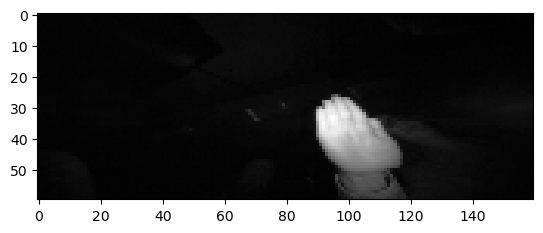

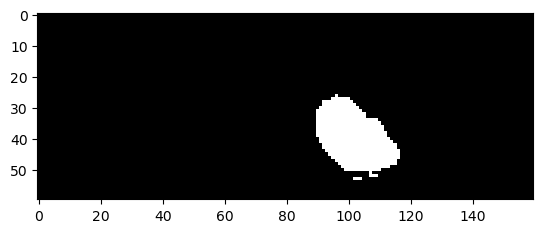

Class Label: 2


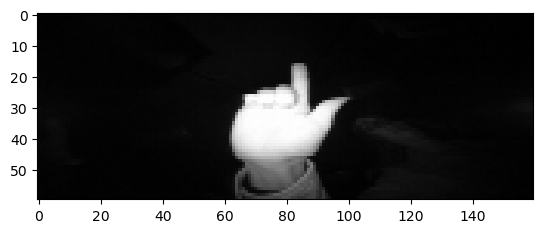

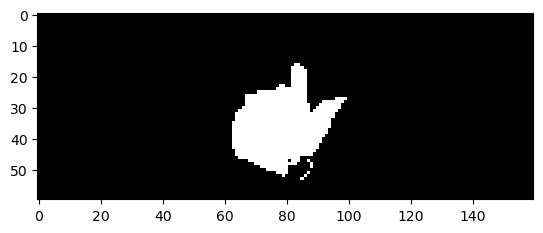

Class Label: 3


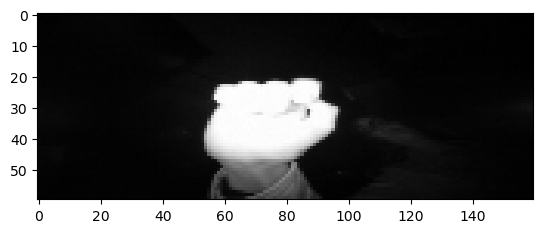

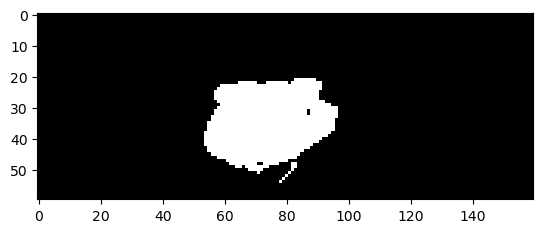

Class Label: 4


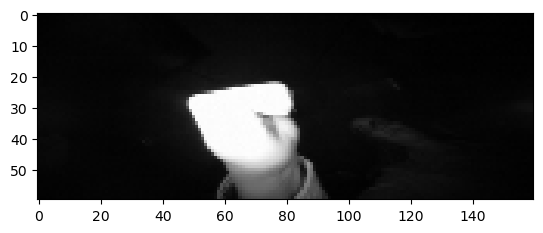

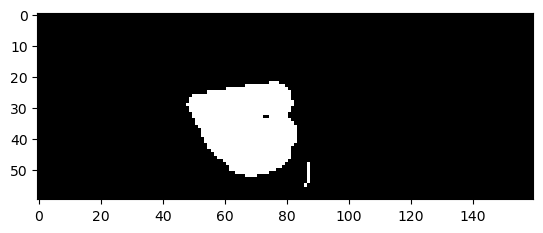

Class Label: 5


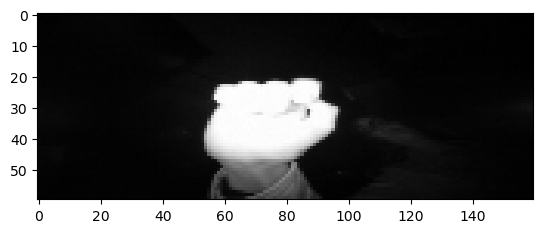

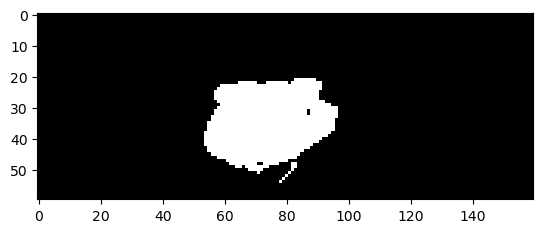

Class Label: 6


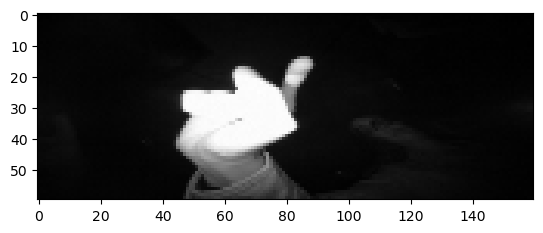

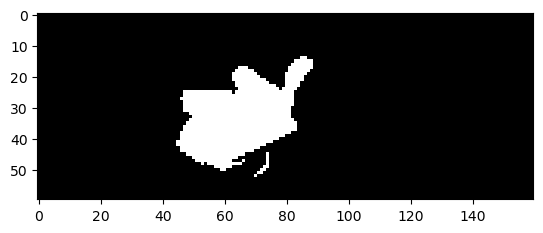

Class Label: 7


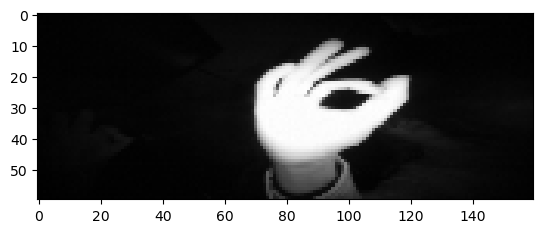

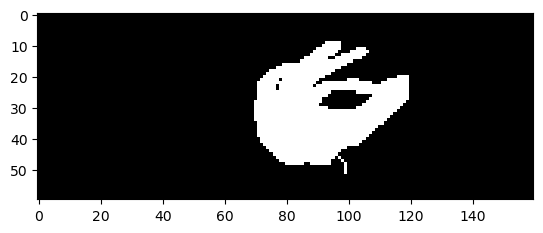

Class Label: 8


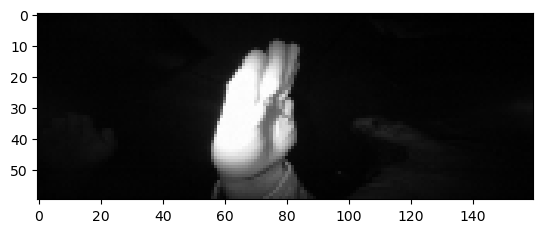

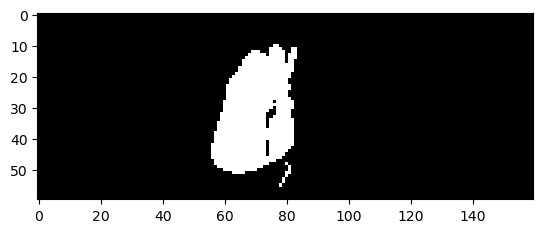

Class Label: 9


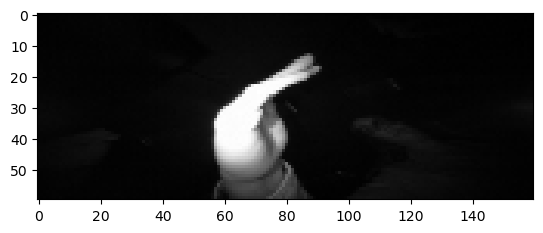

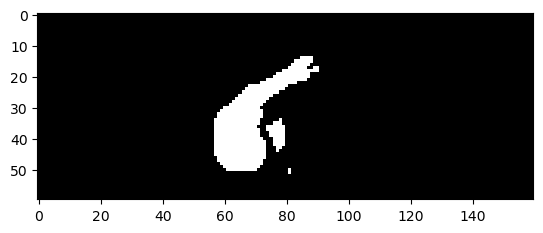

Class Label: 10


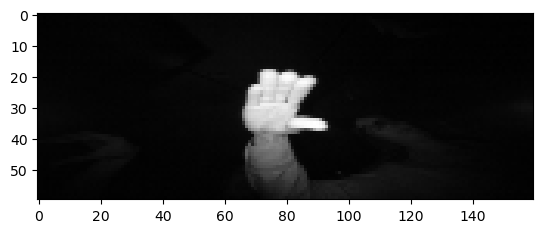

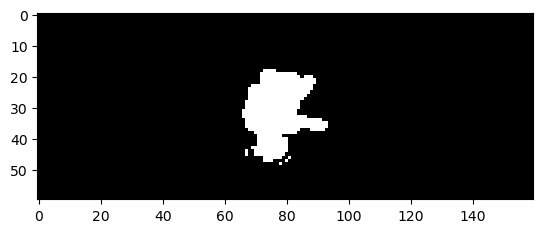

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Add this import

l = []
for i in range(10):
    l.append(0)

for i in range(len(x)):
    if l[y[i] - 1] == 0:
        l[y[i] - 1] = i
        if len(np.unique(l)) == 10:
            break

# Display sample images
for i in range(len(l)):
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap=cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap=cm.gray)     
    plt.show()



In [9]:
# Convert lists x and y to numpy arrays
x = np.array(x)
y = np.array(y)
y = y.reshape(len(x), 1)

print("Shape of x array:", x.shape)
print("Shape of y array:", y.shape)
print("Max label value:", np.max(y))
print("Min label value:", np.min(y))

Shape of x array: (20000, 60, 160)
Shape of y array: (20000, 1)
Max label value: 10
Min label value: 1


In [10]:
# Normalize x_data and flatten the images
x_data = x.reshape((len(x), 60, 160, 1))
x_data = x_data / 255.0
x_data = x_data.reshape(len(x_data), -1)

print("Shape of x_data array:", x_data.shape)

Shape of x_data array: (20000, 9600)


In [11]:
from sklearn.decomposition import PCA

# Convert lists x and y to numpy arrays
x = np.array(x)
y = np.array(y)
y = y.reshape(len(x), 1)

# Normalize x_data and flatten the images
x_data = x.reshape((len(x), 60, 160, 1))
x_data = x_data / 255.0
x_data = x_data.reshape(len(x_data), -1)

# Apply PCA to reduce dimensionality to 4 components
pca = PCA(n_components=4)
x_data_pca = pca.fit_transform(x_data)

print("Explained variance ratio of the components:")
print(pca.explained_variance_ratio_)

print("Singular values of the components:")
print(pca.singular_values_)


Explained variance ratio of the components:
[0.25498139 0.08075452 0.06690615 0.041779  ]
Singular values of the components:
[1529.79553924  860.91952673  783.6320034   619.23884346]


In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and further data
x_train, x_further, y_train, y_further = train_test_split(x_data_pca, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)  
X_test_scaled = scaler.transform(x_further)  

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train_scaled, y_train)

y_pred_sgd = sgd.predict(X_test_scaled) 
y_train_score_sgd = sgd.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
print("Accuracy of the model is:")
print("Test: ", accuracy_score(y_further, y_pred_sgd))
print("Train: ", accuracy_score(y_train, y_train_score_sgd))


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of the model is:
Test:  0.19475
Train:  0.1911875


## SVM

In [14]:
from sklearn.svm import SVC 
svm_model_rbf = SVC(kernel='rbf', C=10, probability=True).fit(X_train_scaled, y_train) 
y_pred_svm = svm_model_rbf.predict(X_test_scaled)
y_train_score_svm = svm_model_rbf.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_further, y_pred_svm)
train_accuracy = accuracy_score(y_train, y_train_score_svm)

print("Accuracy of the model:")
print("Test: {:.4f}".format(test_accuracy))
print("Train: {:.4f}".format(train_accuracy))


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of the model:
Test: 0.8920
Train: 0.9012


## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
y_train_score_gnb = gnb.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_further, y_pred_gnb)
train_accuracy = accuracy_score(y_train, y_train_score_gnb)

print("Accuracy of the Gaussian Naive Bayes model:")
print("Test: {:.4f}".format(test_accuracy))
print("Train: {:.4f}".format(train_accuracy))


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of the Gaussian Naive Bayes model:
Test: 0.2905
Train: 0.2968


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=0)
clf_rft = clf_rft.fit(X_train_scaled, y_train)
y_pred_rft = clf_rft.predict(X_test_scaled)
y_train_score_rft = clf_rft.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_further, y_pred_rft)
train_accuracy = accuracy_score(y_train, y_train_score_rft)

print("Accuracy of the Random Forest Classifier model:")
print("Test: {:.4f}".format(test_accuracy))
print("Train: {:.4f}".format(train_accuracy))


C:\Users\Web Developer\AppData\Local\Temp\ipykernel_15420\2568886406.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rft = clf_rft.fit(X_train_scaled, y_train)


Accuracy of the Random Forest Classifier model:
Test: 0.9665
Train: 0.9964


## K-Nearest Neighbors (KNN) classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_scaled, y_train)  
y_pred_knn = classifier.predict(X_test_scaled)  
y_train_score_knn = classifier.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_further, y_pred_knn)
train_accuracy = accuracy_score(y_train, y_train_score_knn)

print("Accuracy of the K-Nearest Neighbors (KNN) classifier model:")
print("Test: {:.4f}".format(test_accuracy))
print("Train: {:.4f}".format(train_accuracy))


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of the K-Nearest Neighbors (KNN) classifier model:
Test: 0.9650
Train: 0.9802


## LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train_scaled, y_train)
y_pred_logistic = logistic.predict(X_test_scaled)
y_train_score_logistic = logistic.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_further, y_pred_logistic)
train_accuracy = accuracy_score(y_train, y_train_score_logistic)

print("Accuracy of the Logistic Regression model:")
print("Test: {:.4f}".format(test_accuracy))
print("Train: {:.4f}".format(train_accuracy))


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of the Logistic Regression model:
Test: 0.3185
Train: 0.3266


## DecisionTreeClassifier

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train_scaled, y_train)
y_pred_dt = clf.predict(X_test_scaled)
y_train_score_dt = clf.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_further, y_pred_dt)
train_accuracy = accuracy_score(y_train, y_train_score_dt)

print("Accuracy of the Decision Tree Classifier model:")
print("Test: {:.4f}".format(test_accuracy))
print("Train: {:.4f}".format(train_accuracy))


Accuracy of the Decision Tree Classifier model:
Test: 0.8400
Train: 0.8709


## GradientBoostingClassifier model

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier model
gdc_model = GradientBoostingClassifier(learning_rate=0.01, random_state=1)

# Fit the model to the training data
gdc_model.fit(X_train_scaled, y_train)  

# Predict on the test and training data
y_pred_gdc = gdc_model.predict(X_test_scaled)  
y_train_score_gdc = gdc_model.predict(X_train_scaled)  

# Calculate and print the accuracy scores
print("Accuracy of the model on the test set:", accuracy_score(y_further, y_pred_gdc))
print("Accuracy of the model on the training set:", accuracy_score(y_train, y_train_score_gdc))


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of the model on the test set: 0.616
Accuracy of the model on the training set: 0.631


## Voting Classifier

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create the VotingClassifier model
model = VotingClassifier(estimators=[
    ('logistic', logistic),
    ('nb', gnb),
    ('gdc', gdc_model),
    ('clf_rft', clf_rft),
    ('dt', clf),
    ('sv', svm_model_rbf),
    ('knn', classifier),
    ('stochastic', sgd)
], voting='soft')

# Fit the model to the training data
model.fit(X_train_scaled, y_train)  # Make sure X_train_scaled and y_train are already defined

# Predict on the test and training data
y_pred = model.predict(X_test_scaled)  # Make sure X_test_scaled is already defined
y_train_score = model.predict(X_train_scaled)  # Make sure X_train_scaled is already defined

# Calculate and print the accuracy scores
print("Accuracy of the model on the test set:", accuracy_score(y_further, y_pred))
print("Accuracy of the model on the training set:", accuracy_score(y_train, y_train_score))


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of the model on the test set: 0.95775
Accuracy of the model on the training set: 0.975125


## Performers

In [22]:
import pandas as pd
names = ['Stochastic Gradient Classifier', 'K Nearest Neighbour', 'Decision Tree', 'Random Forest Tree',
         'Logistic Regression', 'Naive Bayes', 'Gradient Descent Classifier', 'Support Vector Machine',
         'Voting']
all_models = [y_pred_sgd, y_pred_knn, y_pred_dt, y_pred_rft, y_pred_logistic, y_pred_gnb, y_pred_gdc,
              y_pred_svm, y_pred]
all_training = [y_train_score_sgd, y_train_score_knn, y_train_score_dt, y_train_score_rft, y_train_score_logistic,
                y_train_score_gnb]
all_training += [y_train_score_gdc, y_train_score_svm, y_train_score]

testing_accuracy = []
training_accuracy = []

for i in all_models:
    testing_accuracy.append(accuracy_score(y_further, i, normalize=True, sample_weight=None))

for i in all_training:
    training_accuracy.append(accuracy_score(y_train, i, normalize=True, sample_weight=None))

# Create the DataFrame without the 'Artificial Neural Network' model
df = pd.DataFrame({'Names': names, 'Training Accuracy': training_accuracy, 'Testing Accuracy': testing_accuracy})
df = df[['Names', 'Training Accuracy', 'Testing Accuracy']]
print(df)


                            Names  Training Accuracy  Testing Accuracy
0  Stochastic Gradient Classifier           0.191188           0.19475
1             K Nearest Neighbour           0.980250           0.96500
2                   Decision Tree           0.870875           0.84000
3              Random Forest Tree           0.996375           0.96650
4             Logistic Regression           0.326562           0.31850
5                     Naive Bayes           0.296750           0.29050
6     Gradient Descent Classifier           0.631000           0.61600
7          Support Vector Machine           0.901250           0.89200
8                          Voting           0.975125           0.95775


In [23]:
# Find the best-performing algorithm based on testing accuracy
best_testing_accuracy = max(testing_accuracy)
best_algorithm_index = testing_accuracy.index(best_testing_accuracy)
best_algorithm_name = names[best_algorithm_index]

print(f"The best-performing algorithm is '{best_algorithm_name}' with a testing accuracy of {best_testing_accuracy:.4f}.")


The best-performing algorithm is 'Random Forest Tree' with a testing accuracy of 0.9665.


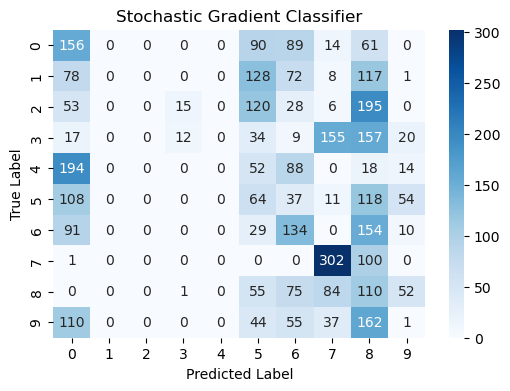

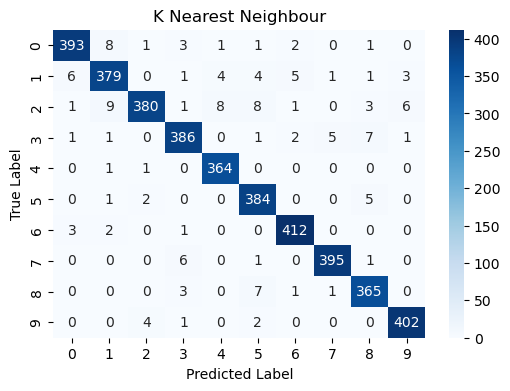

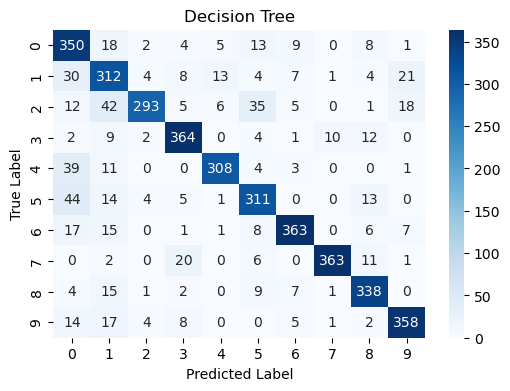

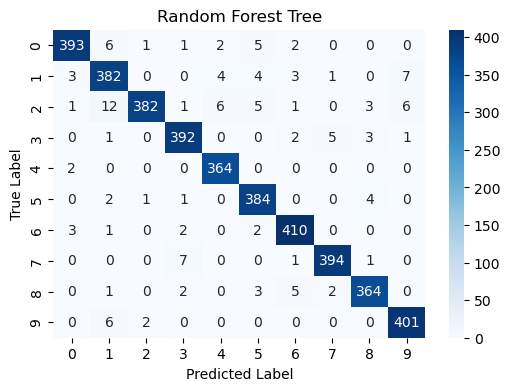

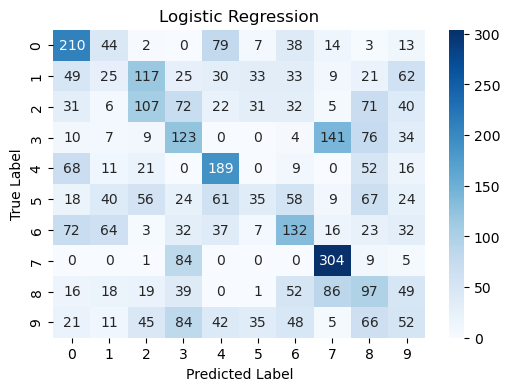

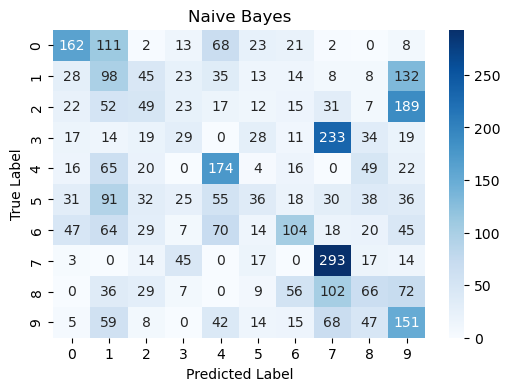

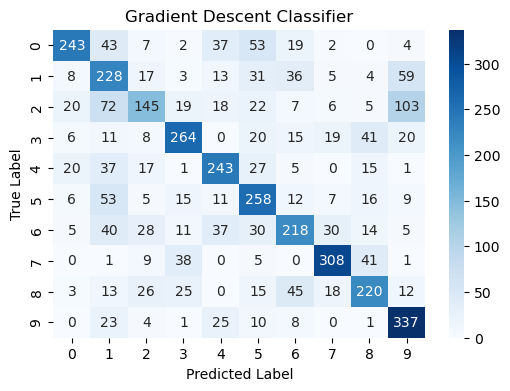

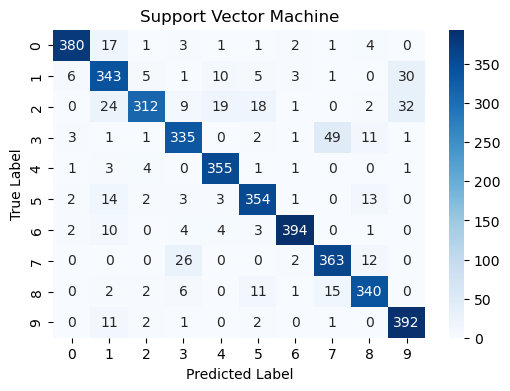

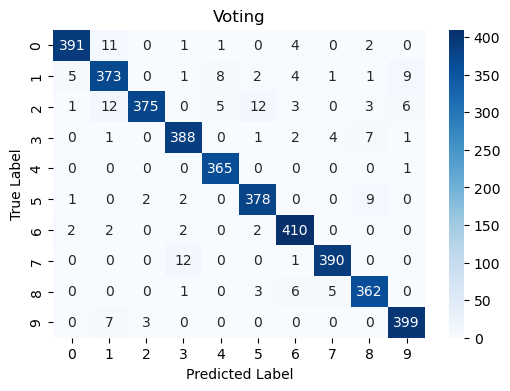

                            Names  Training Accuracy  Testing Accuracy
0  Stochastic Gradient Classifier           0.191188           0.19475
1             K Nearest Neighbour           0.980250           0.96500
2                   Decision Tree           0.870875           0.84000
3              Random Forest Tree           0.996375           0.96650
4             Logistic Regression           0.326562           0.31850
5                     Naive Bayes           0.296750           0.29050
6     Gradient Descent Classifier           0.631000           0.61600
7          Support Vector Machine           0.901250           0.89200
8                          Voting           0.975125           0.95775


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for each model
confusion_matrices = []
for i in all_models:
    confusion_matrices.append(confusion_matrix(y_further, i))


df = pd.DataFrame({'Names': names, 'Training Accuracy': training_accuracy, 'Testing Accuracy': testing_accuracy,
                   'Confusion Matrix': confusion_matrices})

# Plot the confusion matrix for each model
for i, row in df.iterrows():
    plt.figure(figsize=(6, 4))
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(row['Names'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

df = df[['Names', 'Training Accuracy', 'Testing Accuracy']]
print(df)


In [25]:
import keras
from tensorflow.keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)
        
        
    
y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[0 0 1 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [26]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [28]:
from keras import layers
from keras import models

In [29]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 75s 297ms/step - loss: 0.3421 - accuracy: 0.8892 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 2/10
250/250 [==============================] - 77s 309ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0077 - val_accuracy: 0.9970
Epoch 3/10
250/250 [==============================] - 71s 286ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 4/10
250/250 [==============================] - 66s 262ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0030 - val_accuracy: 0.9985
Epoch 5/10
250/250 [==============================] - 65s 259ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 66s 262ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 7/10
250/250 [==============================] - 66s 264ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0033 - val_ac

In [31]:
model.save('cnnoutput.h5')

In [32]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 4s 67ms/step - loss: 4.3004e-06 - accuracy: 1.0000
Accuracy:1.0


### The CNN model achieved very high accuracy (100%) and a very low loss value (4.3004e-06) during the evaluation or training process. This is a strong indication that the model is performing excellently on the given dataset.